## Instalação e import de bibliotecas

In [1]:
!pip install pydotplus
!pip install dtreeviz

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 42.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-cp36-none-any.whl size=52359 sha256=9e0545cbbc4c6564b25d874e3047af15648d41bf3dbe2754dea8d52586bc7904
  Stored in directory: /root/.cache/pip/wheels/6c/42/13/06bfd7ecac5313d2bea233a1e1165fec14a4d3680fa856db57
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=3088f3d5f69b0846ea9938357f707738e48108b81219ed4ff6465d9dcd96dfb0
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Load do dataset

In [3]:
# conexão como o Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
# criação de dataframes paras as abas treinamento e validação do dataset
eReader_train = pd.read_excel('/content/drive/My Drive/Atividade 3 - Bases.xlsx', sheet_name='TREINAMENTO')
eReader_valid = pd.read_excel('/content/drive/My Drive/Atividade 3 - Bases.xlsx', sheet_name='VALIDAÇÃO')

## Tratamento e análise exploratória da base de dados

In [9]:
# delete de coluna desnecesária para análise
del eReader_train['ID_usuário']

In [10]:
del eReader_valid['ID_usuário']

In [11]:
# tamanho do dataset
print("\nDimensões: {0}".format(eReader_train.shape))


Dimensões: (661, 10)


In [12]:
# visualização dos campos do dataset
print("\nCampos: {0}".format(eReader_train.keys()))


Campos: Index(['Gênero', 'Idade', 'Estado_civil', 'Atividade_no_site',
       'Pesquisou_eletronicos_12m', 'Comprou_eletronicos_12m',
       'Pesquisou_mídia_digital_18m', 'Comprou_mídia_digital_18m',
       'Forma_pagamento', 'Adoção_eReader'],
      dtype='object')


In [13]:
# estatísticas descritiva do dataset
print(eReader_train.describe(), sep="\n")

        Idade
count  661.00
mean    42.79
std     13.86
min     16.00
25%     32.00
50%     44.00
75%     55.00
max     66.00


## Transformação e preparação para aplicar Decision Tree

In [14]:
# aplicar iloc para extrar as linhas e converter para dicionario para usar o dictvectorizer
X = eReader_train.iloc[:, 0:(eReader_train.shape[1] - 1)].T.to_dict().values()
vect = DictVectorizer(sparse=False)
# treinando o modelo com fit
X = vect.fit_transform(X)

In [15]:
# aplicar label encoder para converte em forma número os dados
le = LabelEncoder()
# treinando o modelo com fit
y = le.fit_transform(eReader_train.iloc[:, (eReader_train.shape[1] - 1)])

In [16]:
# dividindo o data set em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.1)

In [17]:
print("Atributos:", X)

Atributos: [[1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [18]:
print("Shape da base de treinamento: {0}".format(X_train.shape))

Shape da base de treinamento: (594, 20)


## Indução e particionamento do modelo

In [19]:
# chamada do metodo decision tree
tree_eReader = DecisionTreeClassifier(random_state=0)

In [20]:
# treinamento do modelo
tree_eReader = tree_eReader.fit(X_train, y_train)

In [21]:
print('Acurácia base de treinamento:', tree_eReader.score(X_train, y_train))

Acurácia base de treinamento: 0.877104377104377


In [22]:
# predição do modelo treinado
y_pred = tree_eReader.predict(X_test)
print('acurácia da previsão:', accuracy_score(y_test, y_pred))

acurácia da previsão: 0.4925373134328358


In [23]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

 Early Adopter       0.48      0.57      0.52        23
Early Majority       0.75      0.41      0.53        22
     Innovator       0.40      0.44      0.42         9
 Late Majority       0.39      0.54      0.45        13

      accuracy                           0.49        67
     macro avg       0.51      0.49      0.48        67
  weighted avg       0.54      0.49      0.50        67



In [24]:
# predição do modelo numa matrix de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data=conf_matrix, index=le.classes_, columns=[x + " prev" for x in le.classes_])
print(conf_table)

                Early Adopter prev  Early Majority prev  Innovator prev  \
Early Adopter                   13                    3               3   
Early Majority                   7                    9               1   
Innovator                        3                    0               4   
Late Majority                    4                    0               2   

                Late Majority prev  
Early Adopter                    4  
Early Majority                   5  
Innovator                        2  
Late Majority                    7  


## Exibição da Decision Tree

In [25]:
import pydotplus
from IPython.display import Image

# Criação do dados em DOT
dot_data = tree.export_graphviz(tree_eReader, out_file=None,
                                feature_names=vect.feature_names_,
                                rounded=True,
                                filled=True,
                                class_names=le.classes_)

# Desenhar o gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Print do gráfico
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.

## Testes com mudança de parâmetros da DecisionTree

In [26]:
# alteração do critério para entropy e aplicação dos parâmetros min samples split e max depth
tree_entropy = DecisionTreeClassifier(criterion='entropy', min_samples_split=50,
                                      max_depth=None,
                                      random_state=0)

In [27]:
# treino do modelo
tree_entropy = tree_entropy.fit(X_train, y_train)

In [28]:
print('Acurácia base de treinamento:', tree_entropy.score(X_train, y_train))

Acurácia base de treinamento: 0.6632996632996633


In [29]:
# predição do modelo
y_pred_ = tree_entropy.predict(X_test)
print('acurácia de previsão:', accuracy_score(y_test, y_pred))

acurácia de previsão: 0.4925373134328358


In [30]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

 Early Adopter       0.48      0.57      0.52        23
Early Majority       0.75      0.41      0.53        22
     Innovator       0.40      0.44      0.42         9
 Late Majority       0.39      0.54      0.45        13

      accuracy                           0.49        67
     macro avg       0.51      0.49      0.48        67
  weighted avg       0.54      0.49      0.50        67



In [33]:
# matrix de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data=conf_matrix, index=le.classes_, columns=[x + " (prev)" for x in le.classes_])
print(conf_table)

                Early Adopter (prev)  Early Majority (prev)  Innovator (prev)  \
Early Adopter                     13                      3                 3   
Early Majority                     7                      9                 1   
Innovator                          3                      0                 4   
Late Majority                      4                      0                 2   

                Late Majority (prev)  
Early Adopter                      4  
Early Majority                     5  
Innovator                          2  
Late Majority                      7  


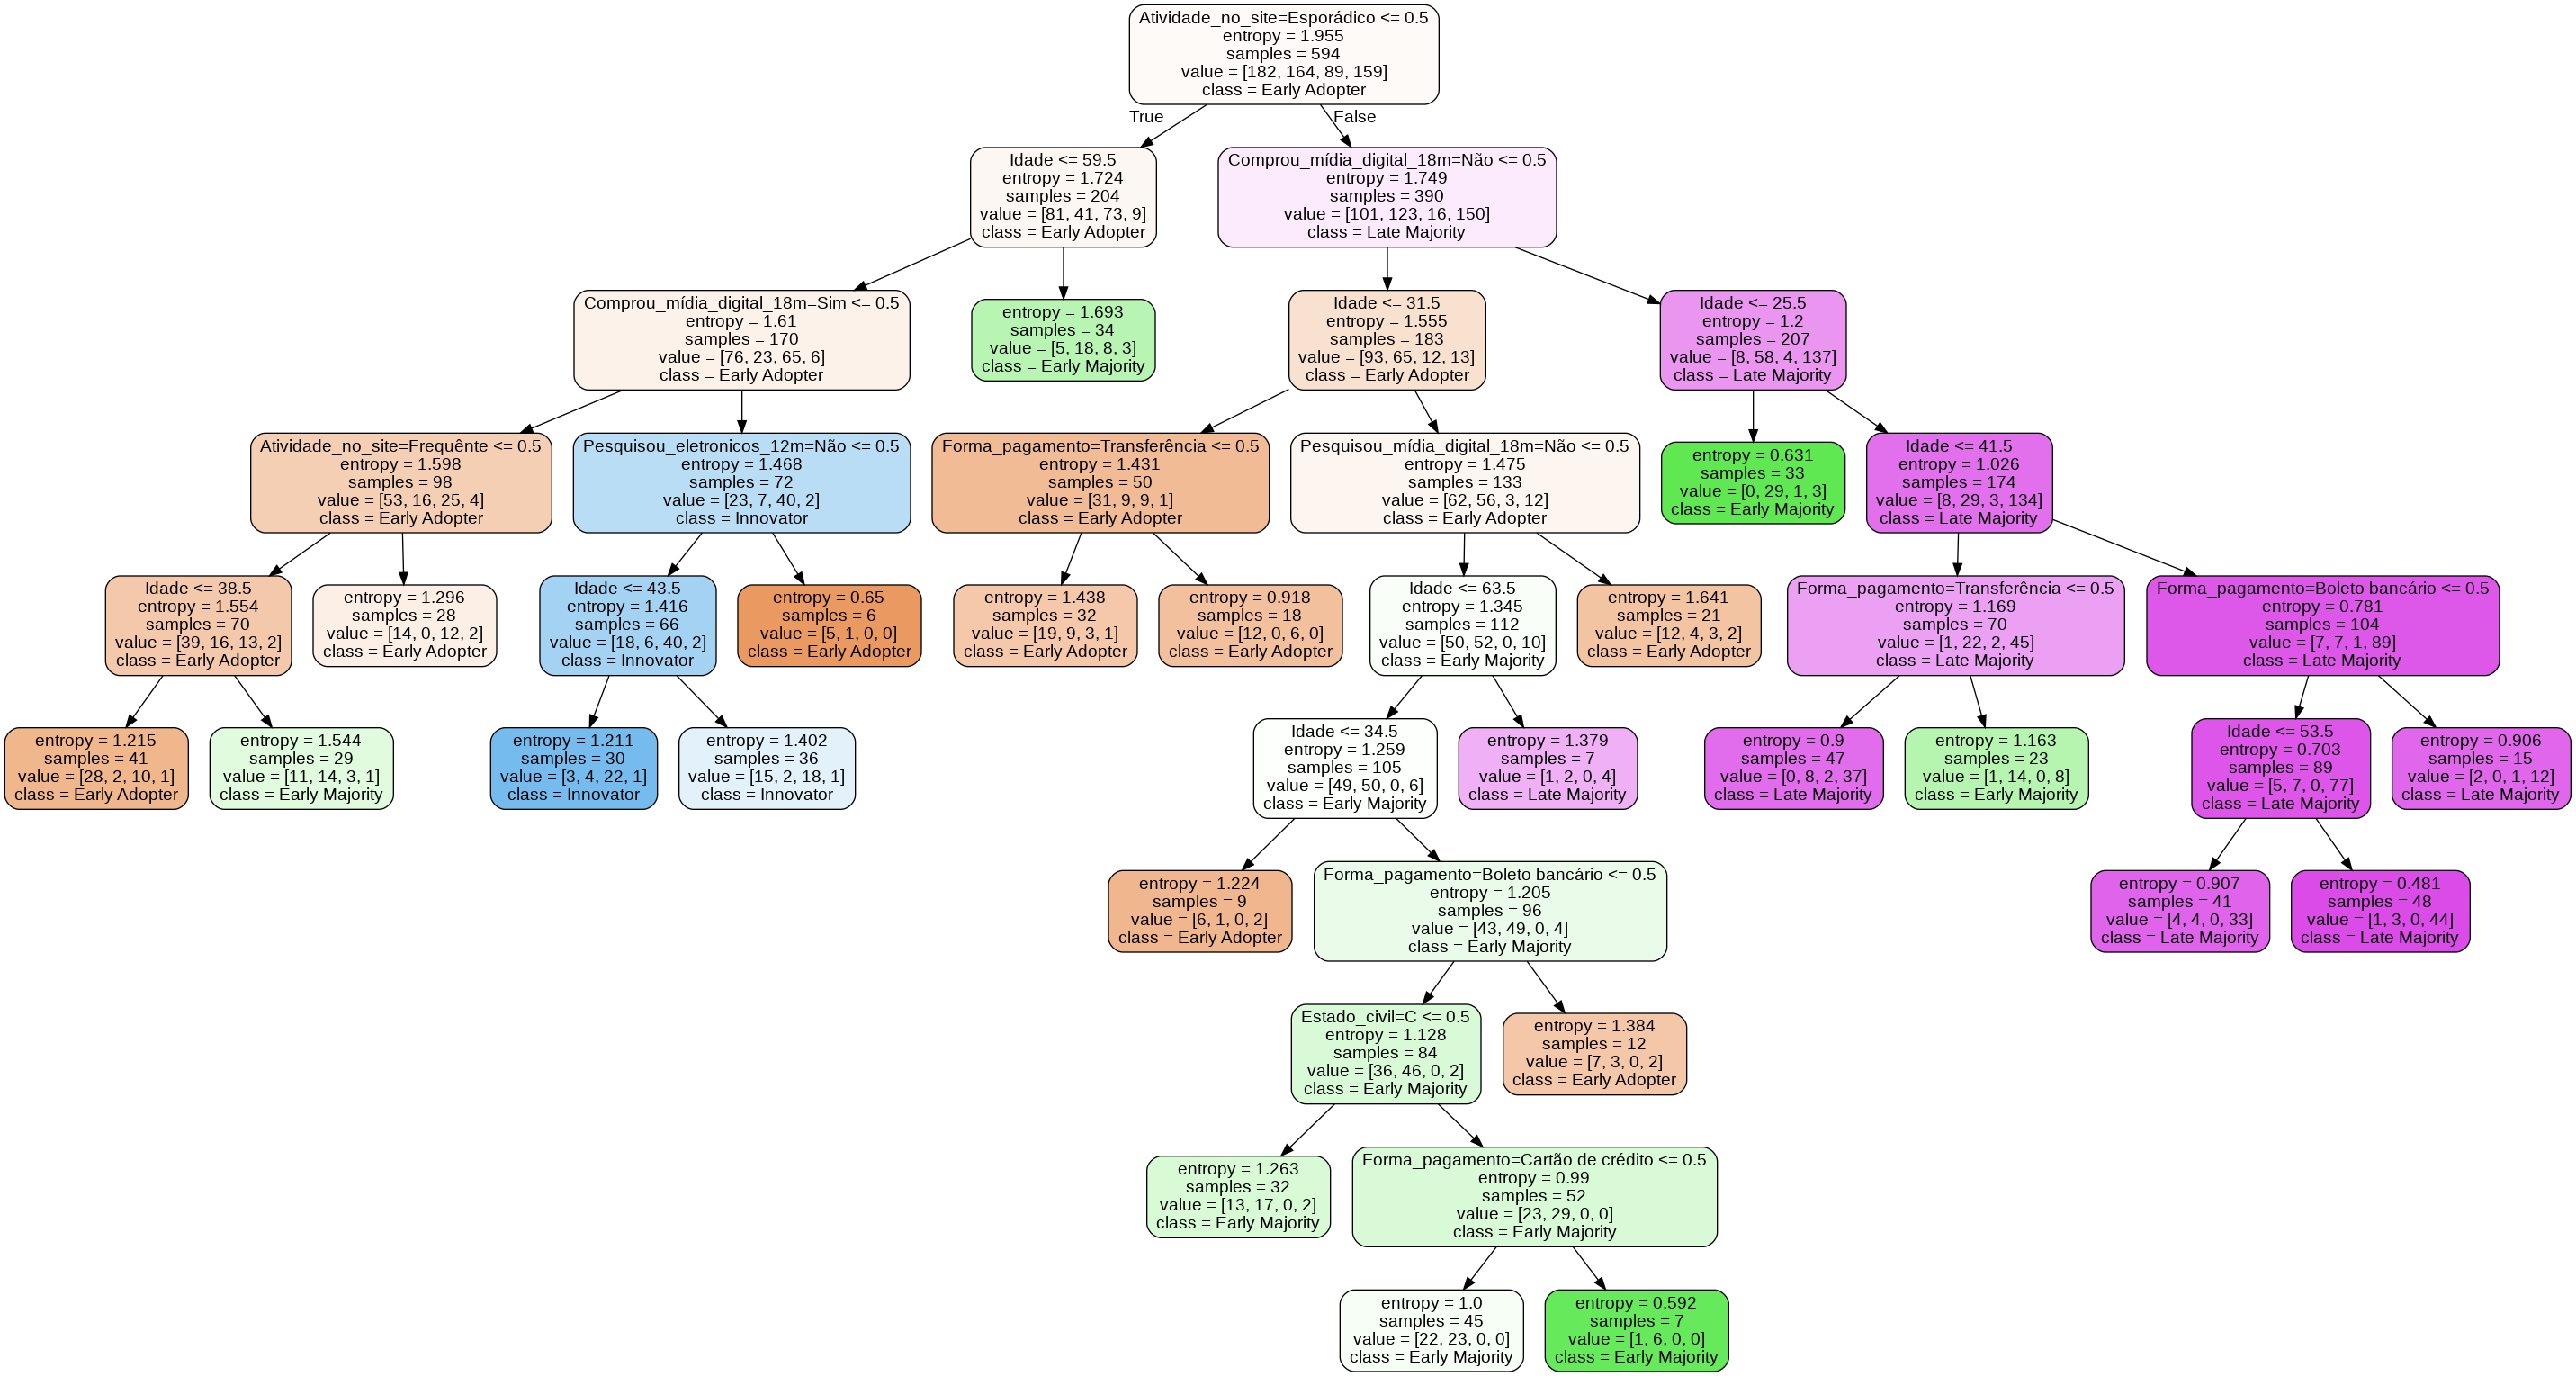

In [34]:
import pydotplus
from IPython.display import Image

# Criação do dados em DOT
dot_data = tree.export_graphviz(tree_entropy, out_file=None,
                                feature_names=vect.feature_names_,
                                rounded=True,
                                filled=True,
                                class_names=le.classes_)

# Desenhar o gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Print do gráfico
Image(graph.create_png())

## Aplicação de GridSearchCV e cross validation

In [35]:
# import da bibliotecas grid search cv e crossvalidation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# criação da arvore de decisão
tree_selection = DecisionTreeClassifier()

# definição dos parâmetros do modelo
params = {'criterion': ('gini', 'entropy'),
          'max_features': (None, 'auto', 'log2'),
          'random_state':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

# aplicação do gridsearch
classif_grid = GridSearchCV(tree_selection, param_grid = params)

# predição do modelo
y_pred = classif_grid.fit(X, y).predict(X_test)

print('Melhores parametros no modelos testados:')
print(classif_grid.best_params_, '\n')

print('Acurácia da previsão:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = le.classes_))

# matrix de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data = conf_matrix, index = le.classes_, columns = [x + "(prev)" for x in le.classes_])
print(conf_table)

Melhores parametros no modelos testados:
{'criterion': 'entropy', 'max_features': None, 'random_state': 4} 

Acurácia da previsão: 0.8656716417910447
                precision    recall  f1-score   support

 Early Adopter       0.81      0.96      0.88        23
Early Majority       1.00      1.00      1.00        22
     Innovator       0.75      0.67      0.71         9
 Late Majority       0.80      0.62      0.70        13

      accuracy                           0.87        67
     macro avg       0.84      0.81      0.82        67
  weighted avg       0.86      0.87      0.86        67

                Early Adopter(prev)  Early Majority(prev)  Innovator(prev)  \
Early Adopter                    22                     0                0   
Early Majority                    0                    22                0   
Innovator                         2                     0                6   
Late Majority                     3                     0                2   

        

In [36]:
# Create DOT data
dot_data = tree.export_graphviz(classif_grid.best_estimator_, out_file=None,
                                proportion=False,
                                rounded=True,
                                filled=True,
                                feature_names=vect.feature_names_,
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

## Conclusão

1. Mudando a quantidade de features do dataset selecionada para análise mudam os valores de acurácia e a estrutura da decisiontree
2. Alterando entre os parâmetros da decisiontree temos resultados diferentes e acurácias diferentes
3. De acordo com a estratégia do cliente, poderiamos variar a forma da análise, por exemplo a demanda do cliente é focar em uma categoria específica, nesse caso poderiamos variar e comparar os parâmetros de acordo com essa estratégia
4. Dado que o dataset era razoavelmente pequeno, optou-se por utlizar um percentual de apenas 10% do dataset para teste e 90% para treino
5. O gridsearchcv e o cross validation são boas opções para comparar/avaliar os melhores parâmetros para a decisiontree